In [1]:
# Dependencies and Setup
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import squarify

# Load .csv file from Resources folder
covid_data = os.path.join("source_data", "owid-covid-data.csv")

# Read purchase data file and store into Pandas data frame
covid_data = pd.read_csv(covid_data, encoding="utf-8")

In [2]:
# Preview data
covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [3]:
# Get data for North America only
covid_data_NA = covid_data.loc[(covid_data["continent"] == "North America")]

In [4]:
# Get data for North American countries with listed total cases
covid_data_NA5 = covid_data_NA.dropna(subset=["total_cases"])
cases_pct = covid_data_NA5.groupby(["location"])["human_development_index"].max()
cases_pct_df = cases_pct.to_frame().sort_values(by=["human_development_index"],ascending=False)
cases_pct_df["population_density"] = covid_data_NA5.groupby(["location"])["population_density"].max()
cases_pct_df["positivity_rate"] = covid_data_NA5.groupby(["location"])["total_cases"].max()/covid_data_NA5.groupby(["location"])["population"].max()
cases_pct_df = cases_pct_df.reset_index()
cases_pct_df

,location,human_development_index,population_density,positivity_rate
0,Canada,0.929,4.037,0.025344
1,United States,0.926,35.608,0.090873
2,Panama,0.815,55.133,0.081714
3,Bahamas,0.814,39.497,0.022721
4,Barbados,0.814,664.463,0.012503
5,Costa Rica,0.810,96.079,0.041899
6,Trinidad and Tobago,0.796,266.886,0.005662
7,Cuba,0.783,110.408,0.006163
8,Saint Kitts and Nevis,0.779,212.865,0.000827
9,Mexico,0.779,66.444,0.017176


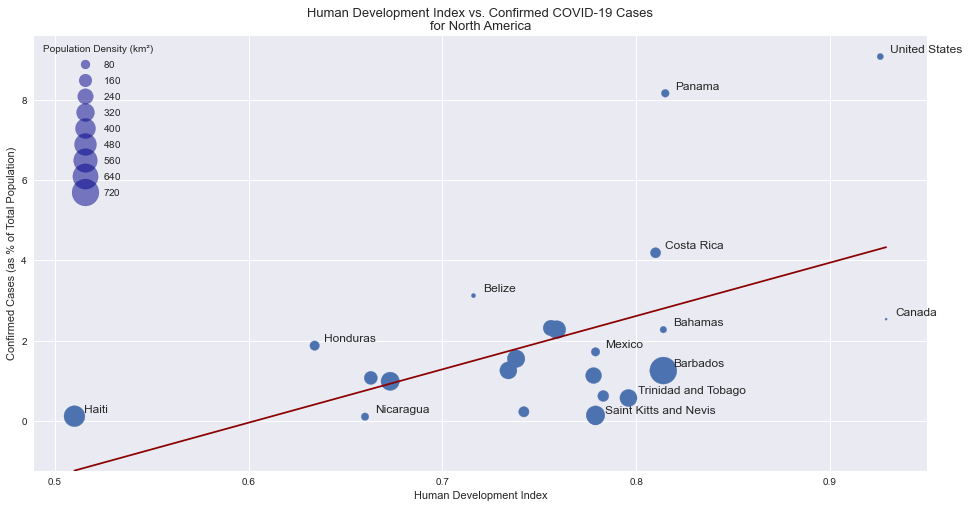

The correlation between a country's Human Development Index and the amount of confirmed COVID-19 cases as a percentage of the population is 0.513226.


In [5]:
# Plot the total case and HDI/population density data
x_values = cases_pct_df["human_development_index"]
y_values = cases_pct_df["positivity_rate"]*100
size = cases_pct_df["population_density"].to_numpy()
s = [1.1*s for s in size]
countries = cases_pct_df["location"]
c_list = [0, 1, 2, 3, 4, 5, 6, 8, 9, 17, 20, 21, 22]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.figure(figsize=(16,8))
plt.style.use("seaborn")
sc = plt.scatter(x_values, y_values, s=s)
plt.plot(x_values, regress_values,"darkred")
plt.ylim(bottom=-1.25)
plt.xlabel("Human Development Index")
plt.ylabel("Confirmed Cases (as % of Total Population)")
plt.title(f"Human Development Index vs. Confirmed COVID-19 Cases\nfor North America", fontsize=13)

for i, txt in enumerate(countries):
    if i in c_list:
        plt.annotate(txt, (x_values[i]+.005, y_values[i]+.1), fontsize=12)

legend = plt.legend(*sc.legend_elements("sizes", num=9, color="darkblue", alpha=0.5), title="Population Density (km²)")
legend.title="sizse"
plt.show()

correlation = st.pearsonr(cases_pct_df["human_development_index"], cases_pct_df["positivity_rate"])
print(f"The correlation between a country's Human Development Index and the amount of confirmed COVID-19 cases as a percentage of the population is {round(correlation[0],6)}.")

fig0 = sc.get_figure()
fig0.savefig("output_data/HDI vs. Cases.svg")

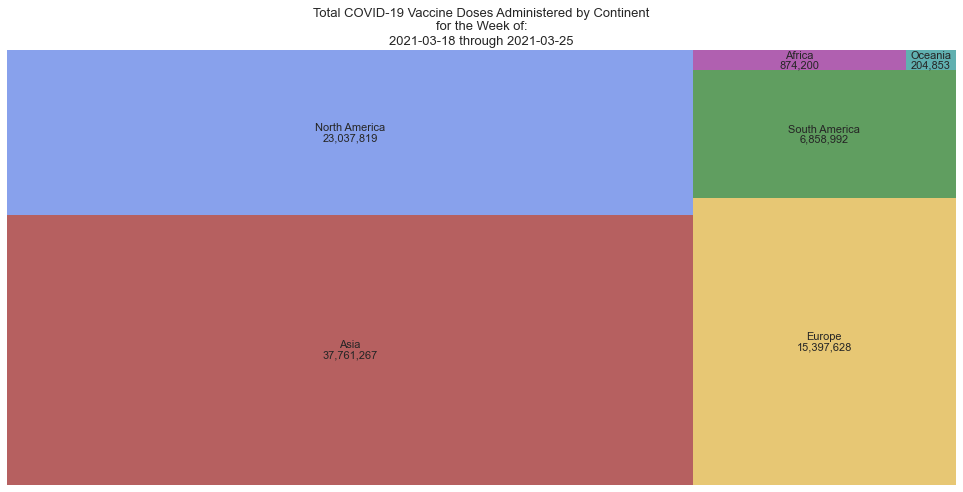

In [6]:
# Get data for total vaccination doses per continent for defined time period
# Plot the data as a treemap
wk_start = "2021-03-18"
wk_end = "2021-03-25"
vax_week = covid_data.loc[covid_data["date"].between(f"{wk_start}", f"{wk_end}")]
vax_week_totals = vax_week.groupby(["continent"])["new_vaccinations"].sum()
vax_week_df = vax_week_totals.to_frame().sort_values(by=["new_vaccinations"],ascending=False)
vax_week_df = vax_week_df.reset_index()

colors = ["darkred", "royalblue", "goldenrod", "darkgreen", "purple", "teal"]
font_dict = {"fontsize": 11, "weight": "medium"}
plt.figure(figsize=(17,8))
plt.title(f"Total COVID-19 Vaccine Doses Administered by Continent\nfor the Week of:\n{wk_start} through {wk_end}", fontsize=13)
sq = squarify.plot(sizes=vax_week_df["new_vaccinations"], label=vax_week_df["continent"], value=vax_week_df["new_vaccinations"].map('{:,.0f}'.format), color=colors, alpha=.625, text_kwargs=font_dict)
plt.axis('off')
# plt.tight_layout()
plt.show()

fig1 = sq.get_figure()
fig1.savefig("output_data/Doses Administered Week.svg")

In [7]:
# Get data for North American countries with listed Stringency Index
covid_data_NA3 = covid_data_NA.dropna(subset=["stringency_index"])
stringency_NA = covid_data_NA3.groupby(["location"])["stringency_index"].mean().round(2)
stringency_NA_df = stringency_NA.to_frame().sort_values(by=["stringency_index"],ascending=False)
stringency_NA_df.reset_index()

,location,stringency_index
0,Honduras,87.69
1,Panama,76.62
2,Bahamas,76.32
3,Dominican Republic,74.54
4,Cuba,74.34
5,Jamaica,73.42
6,Belize,72.10
7,Trinidad and Tobago,71.22
8,El Salvador,69.91
9,Guatemala,68.52


In [8]:
# Get data for North American countries with listed vaccination percentages
covid_data_NA4 = covid_data_NA.dropna(subset=["people_vaccinated_per_hundred"])
vax_pct = covid_data_NA4.groupby(["location"])["people_vaccinated_per_hundred"].max().round(2)
vax_pct_df = vax_pct.to_frame().sort_values(by=["people_vaccinated_per_hundred"],ascending=False)
vax_pct_df.reset_index()

,location,people_vaccinated_per_hundred
0,Cayman Islands,43.53
1,Anguilla,35.65
2,Bermuda,33.80
3,Turks and Caicos Islands,29.14
4,United States,26.12
5,Barbados,21.84
6,Dominica,18.84
7,Montserrat,17.84
8,Saint Kitts and Nevis,14.25
9,Saint Lucia,11.03


In [9]:
# Merge the previous dataframes by country
merge_df2 = pd.merge(stringency_NA_df, vax_pct_df, on="location", how="inner")
merge_df2 = merge_df2.sort_values(by=["people_vaccinated_per_hundred"],ascending=False).reset_index()
merge_df2

,location,stringency_index,people_vaccinated_per_hundred
0,Bermuda,51.40,33.80
1,United States,61.32,26.12
2,Barbados,57.17,21.84
3,Dominica,44.29,18.84
4,Canada,61.43,10.43
5,Dominican Republic,74.54,7.37
6,Greenland,40.30,6.92
7,Belize,72.10,4.57
8,Mexico,58.50,4.15
9,Costa Rica,63.93,4.05


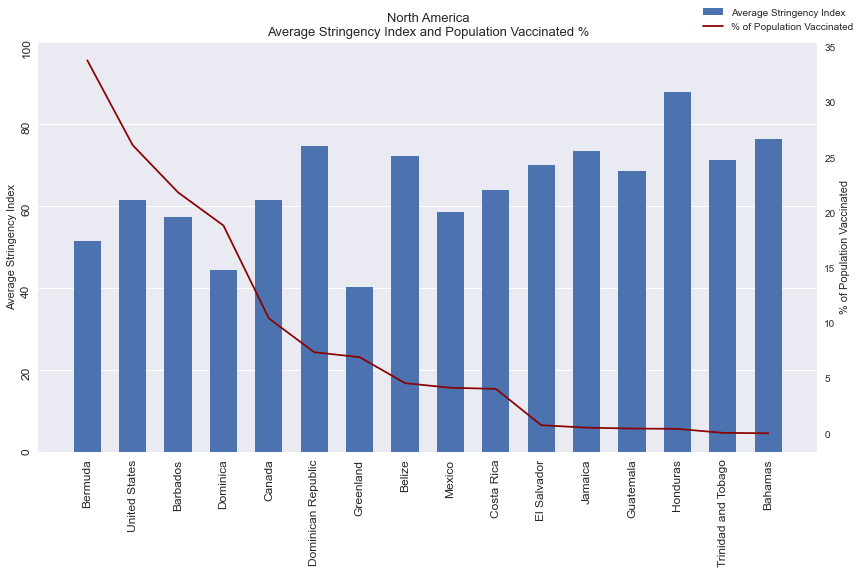

In [10]:
# Plot the Stringency Index and vaccination percentage data
labels = merge_df2["location"]
stringency_values = merge_df2["stringency_index"]
vax_pct_values = merge_df2["people_vaccinated_per_hundred"]
width = 0.6

plt.style.use("seaborn")
fig, ax = plt.subplots(figsize=(12,8))

ax2 = ax.twinx()

ax.bar(labels, stringency_values, width, label="Average Stringency Index")
ax.tick_params(labelrotation=90, labelsize=12)
ax.set_ylabel("Average Stringency Index")
ax.set_ylim(top=100)
ax.grid(axis="x")
ax.set_title(f"North America\nAverage Stringency Index and Population Vaccinated %", fontsize=13)
ax2.plot(vax_pct_values, label="% of Population Vaccinated", color="darkred")
ax2.set_ylabel("% of Population Vaccinated")
# ax2.set_yscale("symlog")
ax2.grid(b=False)
fig.legend()

plt.tight_layout()
plt.show()

fig.savefig("output_data/Avg Stringency Index and Vax Percentage.svg")

In [11]:
# Get data for North American countries with listed GDP per capita
covid_data_NA1 = covid_data_NA.dropna(subset=["gdp_per_capita"])
NA_gdp = covid_data_NA1.groupby(["location"])["gdp_per_capita"].unique().astype(int).round()
NA_gdp_df = NA_gdp.to_frame().sort_values(by=["gdp_per_capita"],ascending=False)
NA_gdp_df.reset_index()

,location,gdp_per_capita
0,United States,54225
1,Bermuda,50669
2,Cayman Islands,49903
3,Canada,44017
4,Trinidad and Tobago,28763
5,Bahamas,27717
6,Saint Kitts and Nevis,24654
7,Panama,22267
8,Antigua and Barbuda,21490
9,Mexico,17336


In [12]:
# Merge the previous dataframes by country
merge_df = pd.merge(NA_gdp_df, vax_pct_df, on="location", how="inner")
merge_df = merge_df.reset_index()
merge_df

,location,gdp_per_capita,people_vaccinated_per_hundred
0,United States,54225,26.12
1,Bermuda,50669,33.80
2,Cayman Islands,49903,43.53
3,Canada,44017,10.43
4,Trinidad and Tobago,28763,0.07
5,Bahamas,27717,0.03
6,Saint Kitts and Nevis,24654,14.25
7,Mexico,17336,4.15
8,Barbados,16978,21.84
9,Costa Rica,15524,4.05


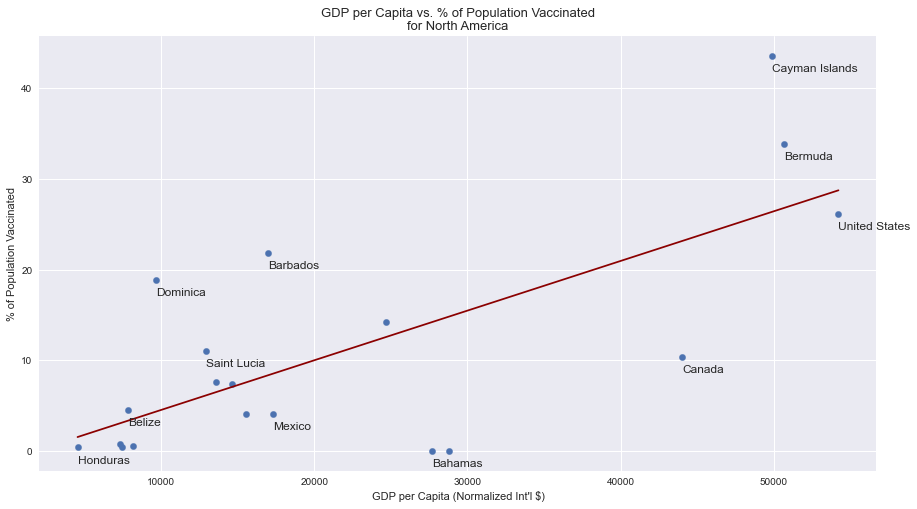

The correlation between GDP per capita and the amount of people vaccinated per hundred is 0.709764.


In [13]:
# Plot the GDP vs. vaccination percentage data
x_values = merge_df["gdp_per_capita"]
y_values = merge_df["people_vaccinated_per_hundred"]
countries = merge_df["location"]
c_list = [0, 1, 2, 3, 5, 7, 8, 12, 13, 15, 18]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
fig2 = plt.figure(figsize=(15,8))
plt.style.use("seaborn")
plt.scatter(x_values, y_values, s=40)
plt.plot(x_values, regress_values,"darkred")
plt.xlabel("GDP per Capita (Normalized Int'l $)")
plt.ylabel("% of Population Vaccinated")
plt.title(f"GDP per Capita vs. % of Population Vaccinated\nfor North America", fontsize=13)

for i, txt in enumerate(countries):
    if i in c_list:
        plt.annotate(txt, (x_values[i]+.25, y_values[i]-1.75), fontsize=12)

plt.show()

correlation = st.pearsonr(merge_df["gdp_per_capita"], merge_df["people_vaccinated_per_hundred"])
print(f"The correlation between GDP per capita and the amount of people vaccinated per hundred is {round(correlation[0],6)}.")

fig2.savefig("output_data/GDP per Capita vs. Vax Percentage.svg")